# Exploratory Data Analysis on Amazon Top 50 Bestselling Books

## 1.0 Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## 2.0 Data description and cleaning

### 2.1 Import data

Import the Amazon Top 50 Bestselling Books from 2009 - 2019 dataset

In [14]:
df = pd.read_csv('bestsellers with categories.csv', encoding = "ISO-8859-1")

### 2.2 Describe the data

Take a look at the data

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.shape

(550, 7)

In [9]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

The dataset has the variables correctly classified with four numeric columns (User Rating, Reviews, Prices, Year) and three alphanumeric variables.

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


The dataset contains 550 columns with the following seven features:
- Name - the name of the book
- Author - the author of the book
- User Rating - average Amazon ratings of users
- Reviews - total number of written reviews on Amazon 
- Price - Price of the book at 13/10/2020
- Year - Year(s) it ranked on the bestseller
- Genre - Fiction or non-fiction

The prices of the books range from \\$0 to \\$105 with an average price of \\$13.10. The user ratings of the book range from 3.3 to 4.9 with an average rating of 4.6.

In [89]:
df.describe(include='O') 

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


There are 351 unique books written by 248 unique authors. This indicates that some books were bestsellers in multiple years and some authors wrote multiple besteller books. The book that reoccurs most frequently is the Publication Manual of the American Psychological Association. Jeff Kinney is the author with the most bestselling books. <br> <br>  There are two uniqe genres in this dataset with Non-Fiction books topping the chart more frequently.

### 2.3 Check for missing values

In [7]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no null values in the dataset.

### 2.4 Analysis of outliers

In [215]:
## Check books that are priced at $0
df[df['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the ConstitutionalÂ,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


This analysis revealed nine unique book titles with a price of $0. This anomaly could be explained by a discount, books that are listed at that price or an error in the data input.

### 2.5 Analysis of low user rating

In [216]:
## Check books that have low User Ratings of less than 4.0
df[df['User Rating']<4]

,Name,Author,User Rating,Reviews,Price,Year,Genre
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction


We see here that lower user ratings go as low as 3.3 for a bestseller. 

### 2.6 Analysis of low reviews

In [217]:
## Check books with low reviews
df[df['Reviews']<1000]

,Name,Author,User Rating,Reviews,Price,Year,Genre
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
27,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,491,14,2010,Non Fiction
31,"Barefoot Contessa, How Easy Is That?: Fabulous...",Ina Garten,4.7,615,21,2010,Non Fiction
39,"Broke: The Plan to Restore Our Trust, Truth an...",Glenn Beck,4.5,471,8,2010,Non Fiction
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction


 The books with lower number of reviews are mostly non-fiction, with Divine Soul Mind Body Healing and Transmission System by Zhi Gang Sha having the lowest number of reviews with 37 reviews. 

### 2.7 Analysis of duplicate values

In [15]:
#check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool

no missing values or duplicate entries, with the variables properly titled and with the right data type

In [11]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


### 2.8 Analysis  of authors and how many books they have on the list 

In [12]:
#Check number of books by author 
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

The author with most the most titles in the list are Jeff Kinney, Gary Chapman, Rick Riordan and Suzanne Collins. 

## 3.0 Data analysis

### 3.1 author with books in fiction and in non-fiction  

In [127]:
#Check if the same author has books in fiction and non-fiction 
df_6 = df.groupby(['Author','Genre'])['Genre'].size().unstack() 
df_6

Genre,Fiction,Non Fiction
Author,,
Abraham Verghese,2.0,NaN
Adam Gasiewski,NaN,1.0
Adam Mansbach,1.0,NaN
Adir Levy,1.0,NaN
Admiral William H. McRaven,NaN,1.0
...,...,...
Walter Isaacson,NaN,3.0
William Davis,NaN,2.0
William P. Young,2.0,NaN


No author has a book in the two categories. 

### 3.2 Authors that dominate the list

Text(0, 0.5, 'Authors')

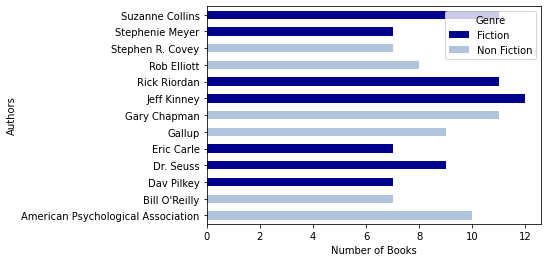

In [161]:
max_repeat = 6
vc = df["Author"].value_counts()
df_11 = df[df["Author"].isin(vc[vc > max_repeat].index)]
df_12 = df_11.reset_index()
df_13 = df_12.groupby(['Author','Genre'])['Genre'].size().unstack() 
df_13.plot(kind='barh', stacked=True, color=['darkblue', 'lightsteelblue'])
plt.xlabel('Number of Books')
plt.ylabel('Authors')

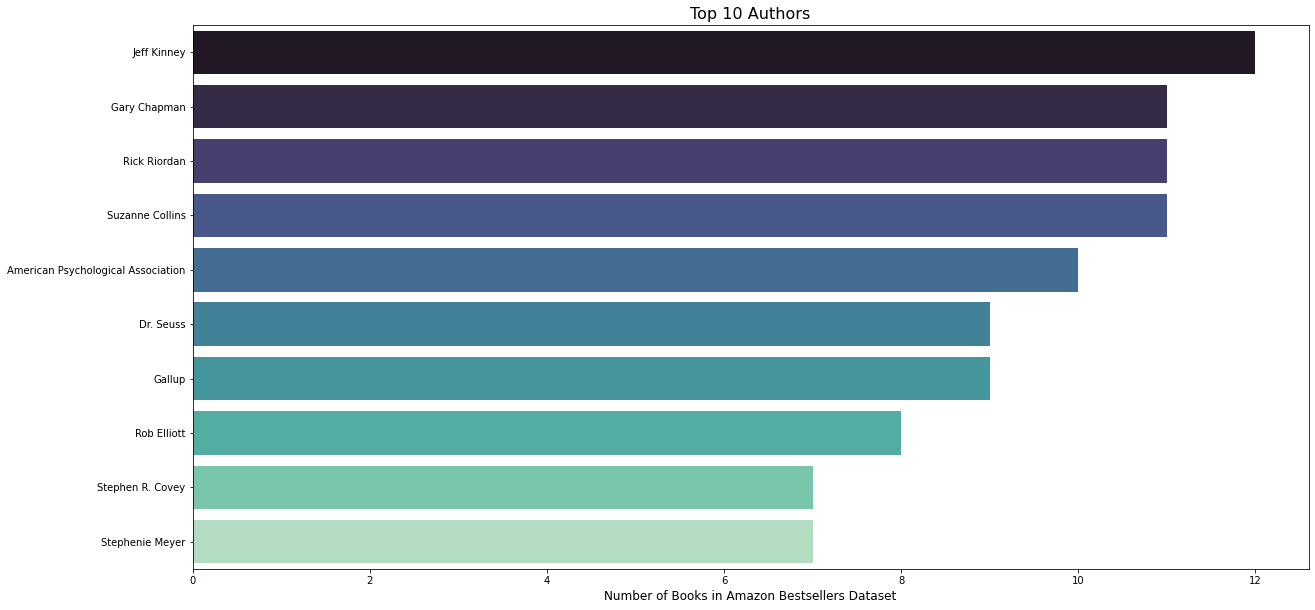

In [158]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=df['Author'].value_counts()[:10].index,x=df['Author'].value_counts()[:10].values, palette="mako")
ax.set_title('Top 10 Authors',fontsize=16)
ax.set_xlabel('Number of Books in Amazon Bestsellers Dataset',fontsize=12)
plt.show()

The top ten authors with the highest number of books in the Amazon bestsellers list are: 1) Jeff Kinney; 2) Gary Chapman, Rick Riordan, Suzanne Collins; 3) The American Psychological Association; 3) Dr. Seuss, 4) Gallup; 5) Rob Elliott; 6) Stephen R. Covey, 7) Stephanie Meyer. Further analysis indicates that each of these authors wrote books in only one genre class: Fiction.  With fiction accounting for a slightly higher percentage of books written by the top authors

### 3.3 Authors that dominate the list, further analysis

In [167]:
df_1 = df['Author'].value_counts()[:20]
#df.groupby(df["contb_receipt_dt"]).contb_receipt_amt.agg(["sum"])
df_2 = df.groupby("Author").filter(lambda x: len(x) > 6).reset_index()
df_2.groupby('Author')

    index                                               Name  \
48    271  Publication Manual of the American Psychologic...   
49    272  Publication Manual of the American Psychologic...   
50    273  Publication Manual of the American Psychologic...   
51    274  Publication Manual of the American Psychologic...   
52    275  Publication Manual of the American Psychologic...   
53    276  Publication Manual of the American Psychologic...   
54    277  Publication Manual of the American Psychologic...   
55    278  Publication Manual of the American Psychologic...   
56    279  Publication Manual of the American Psychologic...   
57    280  Publication Manual of the American Psychologic...   

                                Author  User Rating  Reviews  Price  Year  \
48  American Psychological Association          4.5     8580     46  2009   
49  American Psychological Association          4.5     8580     46  2010   
50  American Psychological Association          4.5     8580    

""


Authors like Dr. Seuss, Eric Carle, Gallup, Gary Chapman, American Psychological Association, and Stephen Covey, are top authors because their books made the bestselling list in multiple years. On the other hand, authors like Bill O’Reilly, Dav Pilkey, Jeff Kinney, Rick Riordan, Rob Elliott, Stephanie Meyer, are top authors because they wrote multiple bestselling books within the dataset timeframe. The authors who wrote multiple books that made the list were typically men and writing fiction series.


### 3.4 User rating analysis

In [192]:
#user rating range 
df_1 = df[df.groupby("Name")["Name"].transform('size') > 2]
df_x = df_1.groupby("Name")['User Rating']
df_x.describe()[['count', 'mean']]

,count,mean
Name,,
Catching Fire (The Hunger Games),3.0,4.700000
Crazy Love: Overwhelmed by a Relentless God,3.0,4.700000
Dear Zoo: A Lift-the-Flap Book,4.0,4.800000
First 100 Words,5.0,4.700000
Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows,3.0,4.600000
Giraffes Can't Dance,5.0,4.800000
Gone Girl,3.0,4.000000
Good to Great: Why Some Companies Make the Leap and Others Don't,4.0,4.500000
Goodnight Moon,3.0,4.800000


In [207]:
df_1 = df[df.groupby("Name")["Name"].transform('size') > 1].reset_index()
df_1[['User Rating','Reviews', 'Price']].mean()

User Rating        4.630847
Reviews        15957.047458
Price             12.942373
dtype: float64

In [208]:
df_1.describe(include='O') 

,Name,Author,Genre
count,295,295,295
unique,96,90,2
top,Publication Manual of the American Psychologic...,Gary Chapman,Non Fiction
freq,10,10,171


In [74]:
df_1 = df[df.groupby("Author")['Author'].transform('size') > 5]
df_x = df_1.groupby("Author")['User Rating']
df_x.describe()

,count,mean,std,min,25%,50%,75%,max
Author,,,,,,,,
American Psychological Association,10.0,4.500000,0.000000e+00,4.5,4.500,4.5,4.500,4.5
Bill O'Reilly,7.0,4.642857,9.759001e-02,4.5,4.600,4.6,4.700,4.8
Dav Pilkey,7.0,4.900000,9.593423e-16,4.9,4.900,4.9,4.900,4.9
Don Miguel Ruiz,6.0,4.700000,0.000000e+00,4.7,4.700,4.7,4.700,4.7
Dr. Seuss,9.0,4.877778,6.666667e-02,4.7,4.900,4.9,4.900,4.9
E L James,6.0,4.233333,3.386247e-01,3.8,3.950,4.4,4.475,4.5
Eric Carle,7.0,4.900000,9.593423e-16,4.9,4.900,4.9,4.900,4.9
Gallup,9.0,4.000000,0.000000e+00,4.0,4.000,4.0,4.000,4.0
Gary Chapman,11.0,4.736364,6.741999e-02,4.6,4.700,4.7,4.800,4.8


The User Ratings range from 3.0 to 4.9 with an average rating of 4.6 which is expected for books that are on the bestselling list.  The books with User Ratings less than 4.0 are all fiction with The Casual Vacancy by J.K. Rowling having the lowest User Rating of 3.3. 

## 3.5 Relationship between User Rating and Price

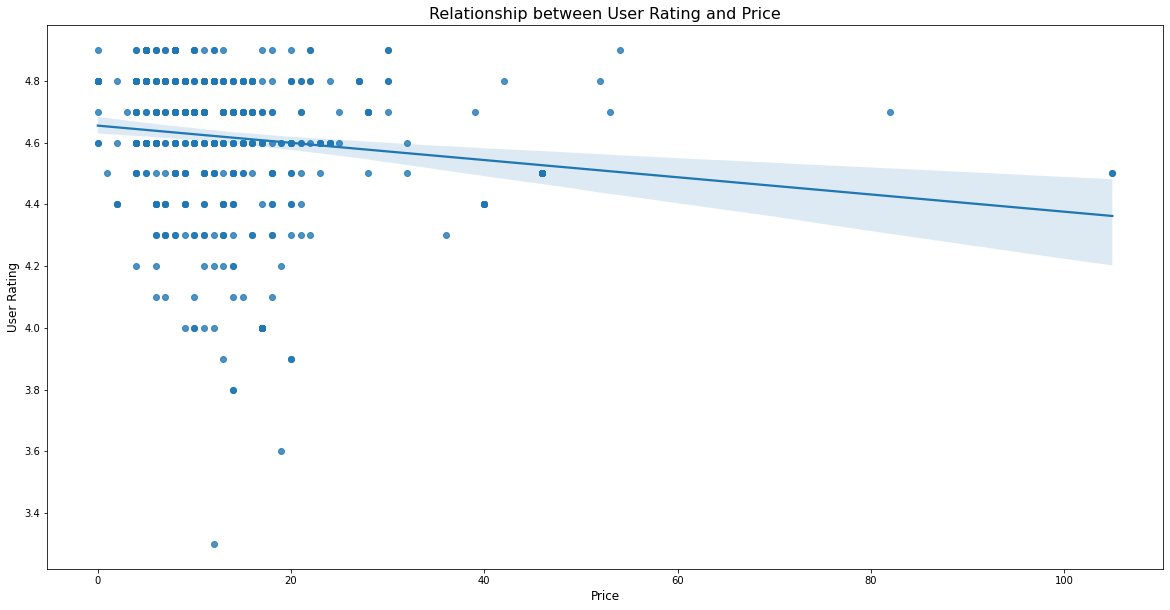

In [83]:
plt.figure(figsize=(20,10))
plot1 = sns.regplot(x=df['Price'],
                    y=df['User Rating'],
                    data=df)
plot1.set_title('Relationship between User Rating and Price',fontsize=16)
plot1.set_xlabel('Price',fontsize=12)
plot1.set_ylabel('User Rating',fontsize=12)
plt.show()

There is a slight negative correlation between user rating and price. 

## 3.6 Genre analysis

Text(0.5, 0, 'Genre')

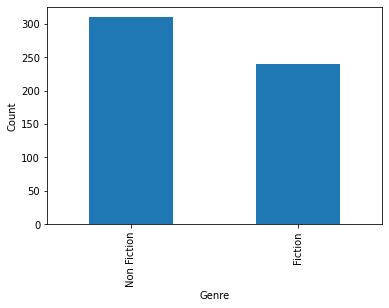

In [15]:
df['Genre'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('User Ratings Count')

Text(0, 0.5, 'Count')

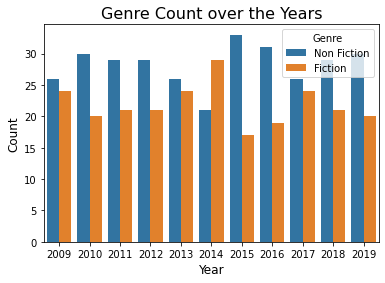

In [16]:
plot2 =sns.countplot(data=df,x='Year', hue='Genre')
plot2.set_title('Genre Count over the Years',fontsize=16)
plot2.set_xlabel('Year',fontsize=12)
plot2.set_ylabel('Count',fontsize=12)

In [159]:
df[df['Year']==2014]

,Name,Author,User Rating,Reviews,Price,Year,Genre
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
45,Capital in the Twenty First Century,Thomas Piketty,4.5,2884,28,2014,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
76,Divergent,Veronica Roth,4.6,27098,15,2014,Fiction
77,Divergent / Insurgent,Veronica Roth,4.5,17684,6,2014,Fiction
110,First 100 Words,Roger Priddy,4.7,17323,4,2014,Non Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction


we observe that a higher proportion of the books in the bestselling list each year is non-fiction with 2014 being the exception. Based on genre and the year's variable, In the eleven-year period that the dataset covers, more non-fiction books are present in the Amazon bestseller list than fiction books.


### 3.7 Genre over the years 

Text(0, 0.5, 'Average User Rating')

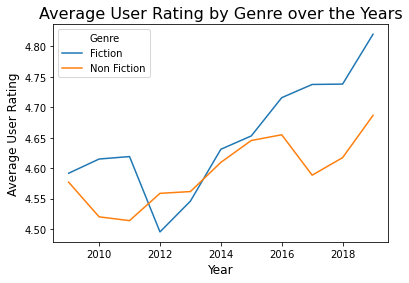

In [17]:
df1 = df.groupby(['Year', 'Genre']).agg(mean_ratings=("User Rating", 'mean'))
df1 = df1.reset_index()
  
plot3 = sns.lineplot(x="Year",
           y="mean_ratings",
           hue="Genre",
           data=df1)
plot3.set_title('Average User Rating by Genre over the Years',fontsize=16)
plot3.set_xlabel('Year',fontsize=12)
plot3.set_ylabel('Average User Rating',fontsize=12)

There is a slight positive increase in User Ratings over the years. 

### 3.8 Average User Reviews by Genre over the Years

Text(0, 0.5, 'Average User Reviews')

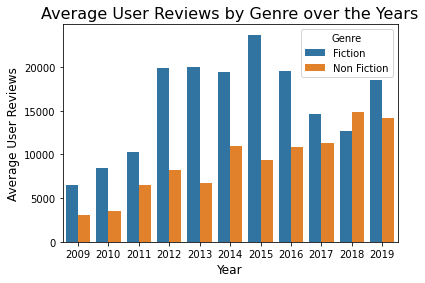

In [18]:
df2 = df.groupby(['Year', 'Genre']).agg(mean_reviews=("Reviews", 'mean'))
df2 = df2.reset_index()

plot3 = sns.barplot(x="Year",
           y="mean_reviews",
           hue="Genre",
           data=df2)
plot3.set_title('Average User Reviews by Genre over the Years',fontsize=16)
plot3.set_xlabel('Year',fontsize=12)
plot3.set_ylabel('Average User Reviews',fontsize=12)

the data indicates an increasing trend in the number of average reviews over the years with fiction books getting significantly more reviews than non-fiction books except in 2018. The correlation analysis also indicates a weak, negative relationship between number of reviews and price.


### 3.9 price ranges for both genres

<Figure size 1440x720 with 0 Axes>

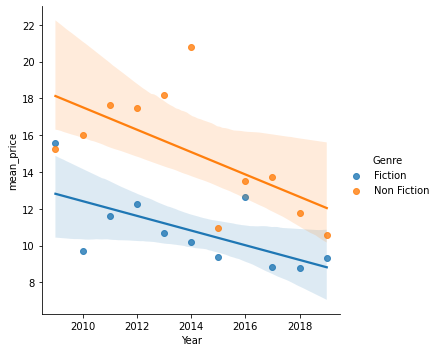

In [84]:
df1 = df.groupby(['Year', 'Genre']).agg(mean_price=("Price", 'mean'))
df1 = df1.reset_index()
  
plot3 = sns.lmplot(x="Year",
           y="mean_price",
           hue="Genre",
           data=df1)
#plot3.set_title('Average Price by Genre over the Years',fontsize=16)
#plot3.set_xlabel('Year',fontsize=12)
#plot3.set_ylabel('Average Price',fontsize=12)

The range of books in the bestseller list is $0 to $105 with an average price of $13.10. Analysis of the data indicates that non-fiction books are more expensive than fiction books. However, the prices of fiction and nonfiction books decreased over the time frame. This could be explained by the introduction of the cheaper ebooks into the market. 


### 3.10 books with the highest number of reviews

In [31]:
df3 = df.sort_values(by=['Reviews','Year'],ascending=[False,True])[:20]
df3.drop_duplicates(subset ="Name",
                     keep = 'last', inplace = True)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Book', 'Number of Reviews','Year','Genre']),
    cells=dict(values=[df3.Name,
                       df3.Reviews,
                       df3.Year,
                       df3.Genre])
)])
fig.show()

### 3.11 books with the highest User rating

In [32]:
df4 = df.sort_values(by=['User Rating','Year'],ascending=[False,True])[:53]
df4.drop_duplicates(subset ="Name",
                     keep = 'last', inplace = True)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Book', 'User Rating','Year','Genre']),
    cells=dict(values=[df4.Name,
                       list(df4['User Rating']),
                       df4.Year,
                       df4.Genre]))])
fig.show()

### 3.12 number of books taking into account genre

Text(0, 0.5, 'Number of Books')

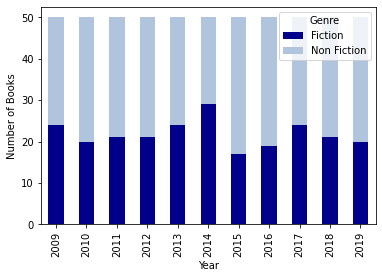

In [87]:
df_6 = df.groupby(['Year','Genre'])['Genre'].size().unstack() 
df_6.plot(kind='bar', stacked=True, color=['darkblue', 'lightsteelblue'])
plt.xlabel('Year')
plt.ylabel('Number of Books')

### 3.13 User rating count

Text(0.5, 1.0, 'User Ratings Count')

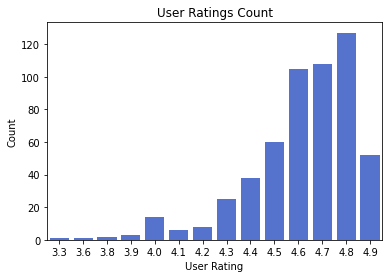

In [115]:
df_7 = df['User Rating'].value_counts().reset_index()

sns.barplot(x = 'index', y = 'User Rating', color="royalblue", data = df_7)
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.title('User Ratings Count')

### 3.14 Average User Ratings over the Years

(4.4, 4.8)

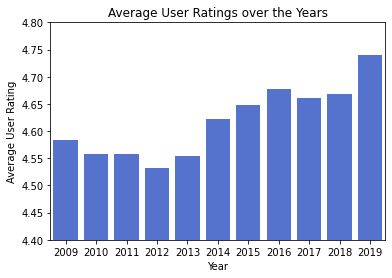

In [107]:
df_8 = df.groupby('Year').mean().reset_index()

fig_8 = sns.barplot(x = 'Year', y = 'User Rating', color="royalblue", data = df_8)
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.title('Average User Ratings over the Years')
fig_8.set_ylim(4.4,4.8)

### 3.15 Average Number of Reviews over the Years

Text(0.5, 1.0, 'Average Number of Reviews over the Years')

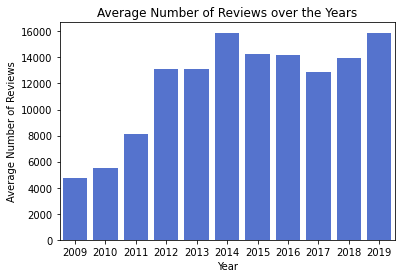

In [176]:
df_13 = df.groupby('Year').mean().reset_index()

fig_13 = sns.barplot(x = 'Year', y = 'Reviews', color="royalblue", data = df_13)
plt.xlabel('Year')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews over the Years')


### 3.16 Average Price over the Years

(8.0, 16.0)

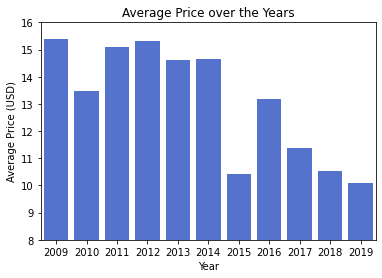

In [113]:
df_9 = df.groupby('Year').mean().reset_index()

fig_9 = sns.barplot(x = 'Year', y = 'Price', color= "royalblue", data = df_9)
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.title('Average Price over the Years')
fig_9.set_ylim(8,16)

## 3.16 Relationship between user rating and reviews

/Users/ashioma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



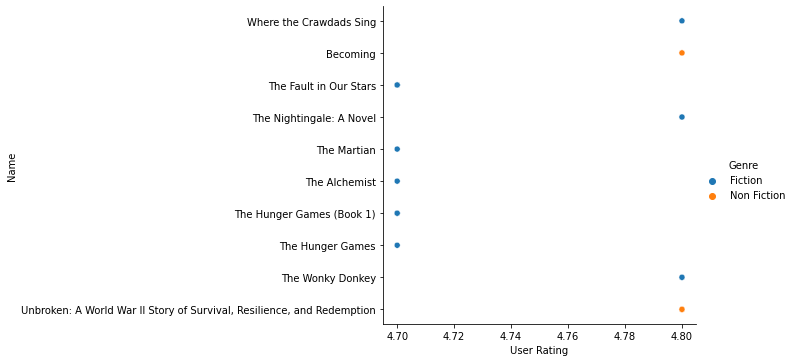

In [121]:
df_10 = df.loc[df['User Rating'] > 4.65].sort_values('Reviews', ascending = False)
sns.relplot(x = 'User Rating', y = 'Name', hue = 'Genre', data = df_10[:20])